In [55]:
import os
# import requests
# from urllib.request import urlopen
# import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load data

In [21]:
url_to_covid = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [44]:
df_orig = pd.read_csv(url_to_covid)

# Understand structure

In [45]:
df_orig.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [46]:
df = df_orig[df_orig.location == 'Austria']

In [47]:
df

iso_code continent location        date  total_cases  new_cases  \
2398      AUT    Europe  Austria  2019-12-31          0.0        0.0   
2399      AUT    Europe  Austria  2020-01-01          0.0        0.0   
2400      AUT    Europe  Austria  2020-01-02          0.0        0.0   
2401      AUT    Europe  Austria  2020-01-03          0.0        0.0   
2402      AUT    Europe  Austria  2020-01-04          0.0        0.0   
...       ...       ...      ...         ...          ...        ...   
2657      AUT    Europe  Austria  2020-09-15      33884.0      549.0   
2658      AUT    Europe  Austria  2020-09-16      34744.0      860.0   
2659      AUT    Europe  Austria  2020-09-17      35448.0      704.0   
2660      AUT    Europe  Austria  2020-09-18      36370.0      922.0   
2661      AUT    Europe  Austria  2020-09-19      37191.0      821.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
2398                 NaN           0.0         0.0                  NaN  ...   
2399                 NaN           0.0         0.0                  NaN  ...   
2400                 NaN           0.0         0.0                  NaN  ...   
2401                 NaN           0.0         0.0                  NaN  ...   
2402                 NaN           0.0         0.0                  NaN  ...   
...                  ...           ...         ...                  ...  ...   
2657             597.000         757.0         1.0                1.571  ...   
2658             649.143         757.0         0.0                1.429  ...   
2659             642.000         758.0         1.0                1.571  ...   
2660             702.714         758.0         0.0                1.429  ...   
2661             676.429         763.0         5.0                1.857  ...   

      gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
2398       45436.686              0.7                145.183   
2399       45436.686              0.7                145.183   
2400       45436.686              0.7                145.183   
2401       45436.686              0.7                145.183   
2402       45436.686              0.7                145.183   
...              ...              ...                    ...   
2657       45436.686              0.7                145.183   
2658       45436.686              0.7                145.183   
2659       45436.686              0.7                145.183   
2660       45436.686              0.7                145.183   
2661       45436.686              0.7                145.183   

      diabetes_prevalence  female_smokers  male_smokers  \
2398                 6.35            28.4          30.9   
2399                 6.35            28.4          30.9   
2400                 6.35            28.4          30.9   
2401                 6.35            28.4          30.9   
2402                 6.35            28.4          30.9   
...                   ...             ...           ...   
2657                 6.35            28.4          30.9   
2658                 6.35            28.4          30.9   
2659                 6.35            28.4          30.9   
2660                 6.35            28.4          30.9   
2661                 6.35            28.4          30.9   

      handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
2398                     NaN                        7.37            81.54   
2399                     NaN                        7.37            81.54   
2400                     NaN                        7.37            81.54   
2401                     NaN                        7.37            81.54   
2402                     NaN                        7.37            81.54   
...                      ...                         ...              ...   
2657                     NaN                        7.37            81.54   
2658                     NaN                        7.37            81.54   
2659    

/Users/danieldeutsch/opt/anaconda3/envs/ml_api_covid/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


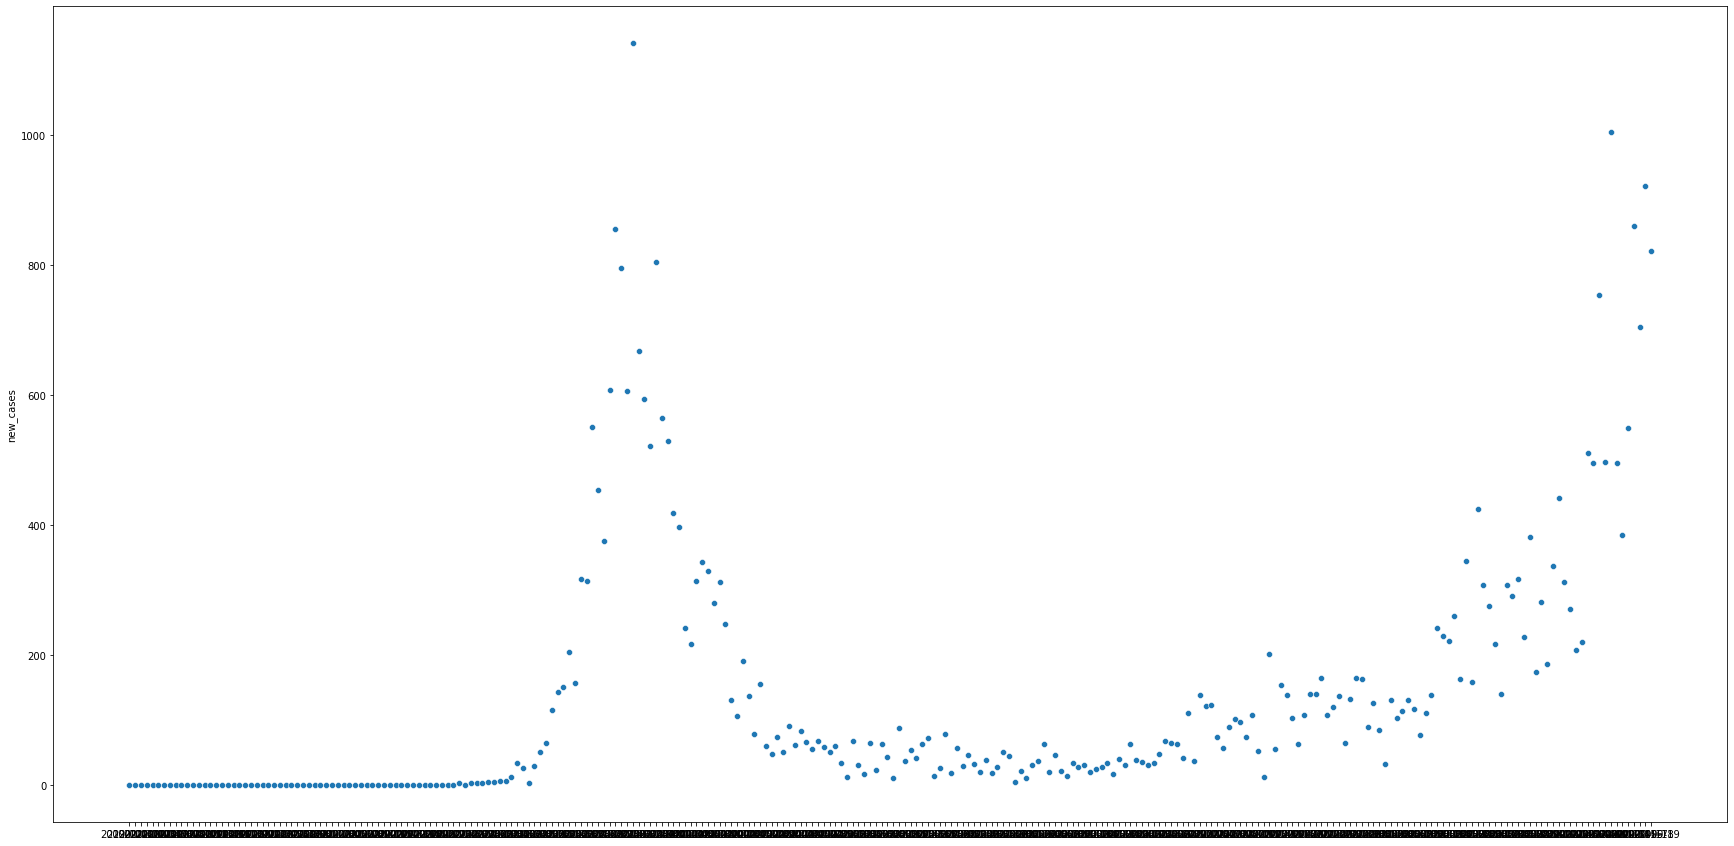

In [61]:
_ = plt.figure(figsize=(30, 15))
sns.scatterplot(sorted(df.date), df.new_cases);

## Check missing

In [142]:
df = df_orig.copy()

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44785 entries, 0 to 44784
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         44521 non-null  object 
 1   continent                        44257 non-null  object 
 2   location                         44785 non-null  object 
 3   date                             44785 non-null  object 
 4   total_cases                      44182 non-null  float64
 5   new_cases                        43982 non-null  float64
 6   new_cases_smoothed               43200 non-null  float64
 7   total_deaths                     44182 non-null  float64
 8   new_deaths                       43982 non-null  float64
 9   new_deaths_smoothed              43200 non-null  float64
 10  total_cases_per_million          43918 non-null  float64
 11  new_cases_per_million            43918 non-null  float64
 12  new_cases_smoothed

In [128]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

column_name  \
new_tests                                              new_tests   
new_tests_per_thousand                    new_tests_per_thousand   
total_tests_per_thousand                total_tests_per_thousand   
total_tests                                          total_tests   
tests_per_case                                    tests_per_case   
positive_rate                                      positive_rate   
new_tests_smoothed                            new_tests_smoothed   
new_tests_smoothed_per_thousand  new_tests_smoothed_per_thousand   
tests_units                                          tests_units   
handwashing_facilities                    handwashing_facilities   
extreme_poverty                                  extreme_poverty   
male_smokers                                        male_smokers   
female_smokers                                    female_smokers   
hospital_beds_per_thousand            hospital_beds_per_thousand   
stringency_index                                stringency_index   
human_development_index                  human_development_index   
aged_65_older                                      aged_65_older   
gdp_per_capita                                    gdp_per_capita   
aged_70_older                                      aged_70_older   
median_age                                            median_age   
cardiovasc_death_rate                      cardiovasc_death_rate   
diabetes_prevalence                          diabetes_prevalence   
population_density                            population_density   
new_deaths_smoothed_per_million  new_deaths_smoothed_per_million   
new_cases_smoothed_per_million    new_cases_smoothed_per_million   
new_cases_smoothed                            new_cases_smoothed   
new_deaths_smoothed                          new_deaths_smoothed   
new_deaths_per_million                    new_deaths_per_million   
total_cases_per_million                  total_cases_per_million   
new_cases_per_million                      new_cases_per_million   
total_deaths_per_million                total_deaths_per_million   
life_expectancy                                  life_expectancy   
new_cases                                              new_cases   
new_deaths                                            new_deaths   
total_deaths                                        total_deaths   
total_cases                                          total_cases   
continent                                              continent   
population                                            population   
iso_code                                                iso_code   
date                                                        date   
location                                                location   

                                 percent_missing  
new_tests                              65.061963  
new_tests_per_thousand                 65.061963  
total_tests_per_thousand               64.224629  
total_tests                            64.224629  
tests_per_case                         63.941052  
positive_rate                          63.083622  
new_tests_smoothed                     60.772580  
new_tests_smoothed_per_thousand        60.772580  
tests_units                            58.972870  
handwashing_facilities                 58.338729  
extreme_poverty                        41.225857  
male_smokers                           30.863012  
female_smokers                         29.981020  
hospital_beds_per_thousand             19.305571  
stringency_index                       17.255778  
human_development_index                13.904209  
aged_65_older                          12.113431  
gdp_per_capita                         11.930334  
aged_70_older                          11.253768  
median_age                             10.791560  
cardiovasc_death_rate                  10.758066  
diabetes_prevalence                     7.634253  
population_density     

In [129]:
cols_too_many_missing = missing_value_df[missing_value_df.percent_missing > 50].index.tolist()
len(cols_too_many_missing)
cols_too_many_missing

10

['new_tests',
 'new_tests_per_thousand',
 'total_tests_per_thousand',
 'total_tests',
 'tests_per_case',
 'positive_rate',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_units',
 'handwashing_facilities']

In [130]:
len(df.columns)

41

In [131]:
df_reduced = df.drop(columns=cols_too_many_missing)

In [132]:
len(df_reduced.columns)

31

In [133]:
df_reduced

iso_code continent       location        date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan  2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan  2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan  2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan  2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan  2020-01-04          0.0        0.0   
...        ...       ...            ...         ...          ...        ...   
44780      NaN       NaN  International  2020-09-15        696.0        NaN   
44781      NaN       NaN  International  2020-09-16        696.0        NaN   
44782      NaN       NaN  International  2020-09-17        696.0        NaN   
44783      NaN       NaN  International  2020-09-18        696.0        NaN   
44784      NaN       NaN  International  2020-09-19        696.0        NaN   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                     NaN           0.0         0.0                  NaN   
1                     NaN           0.0         0.0                  NaN   
2                     NaN           0.0         0.0                  NaN   
3                     NaN           0.0         0.0                  NaN   
4                     NaN           0.0         0.0                  NaN   
...                   ...           ...         ...                  ...   
44780                 NaN           7.0         NaN                  NaN   
44781                 NaN           7.0         NaN                  NaN   
44782                 NaN           7.0         NaN                  NaN   
44783                 NaN           7.0         NaN                  NaN   
44784                 NaN           7.0         NaN                  NaN   

       total_cases_per_million  new_cases_per_million  \
0                          0.0                    0.0   
1                          0.0                    0.0   
2                          0.0                    0.0   
3                          0.0                    0.0   
4                          0.0                    0.0   
...                        ...                    ...   
44780                      NaN                    NaN   
44781                      NaN                    NaN   
44782                      NaN                    NaN   
44783                      NaN                    NaN   
44784                      NaN                    NaN   

       new_cases_smoothed_per_million  total_deaths_per_million  \
0                                 NaN                       0.0   
1                                 NaN                       0.0   
2                                 NaN                       0.0   
3                                 NaN                       0.0   
4                                 NaN                       0.0   
...                               ...                       ...   
44780                             NaN                       NaN   
44781                             NaN                       NaN   
44782                             NaN                       NaN   
44783                             NaN                       NaN   
44784                             NaN                       NaN   

       new_deaths_per_million  new_deaths_smoothed_per_million  \
0                         0.0                              NaN   
1                         0.0                              NaN   
2                         0.0                              NaN   
3                         0.0                              NaN   
4                         0.0                              NaN   
...                       ...                              ...   
44780                     NaN                              NaN   
44781                     NaN                              NaN   
44782                     NaN                              N

In [134]:
df = df_reduced

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44785 entries, 0 to 44784
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         44521 non-null  object 
 1   continent                        44257 non-null  object 
 2   location                         44785 non-null  object 
 3   date                             44785 non-null  object 
 4   total_cases                      44182 non-null  float64
 5   new_cases                        43982 non-null  float64
 6   new_cases_smoothed               43200 non-null  float64
 7   total_deaths                     44182 non-null  float64
 8   new_deaths                       43982 non-null  float64
 9   new_deaths_smoothed              43200 non-null  float64
 10  total_cases_per_million          43918 non-null  float64
 11  new_cases_per_million            43918 non-null  float64
 12  new_cases_smoothed

In [136]:
missing_iso_code = df[df.iso_code.isna()]
df = df.drop(index=missing_iso_code.index)

In [148]:
missing_continent = df[df.continent.isna()]
df = df.drop(index=missing_continent.index)

In [149]:
for col in df.columns: 
    col, df[col].isna().sum()

('iso_code', 0)

('continent', 0)

('location', 0)

('date', 0)

('total_cases', 603)

('new_cases', 603)

('new_cases_smoothed', 1380)

('total_deaths', 603)

('new_deaths', 603)

('new_deaths_smoothed', 1380)

('total_cases_per_million', 603)

('new_cases_per_million', 603)

('new_cases_smoothed_per_million', 1380)

('total_deaths_per_million', 603)

('new_deaths_per_million', 603)

('new_deaths_smoothed_per_million', 1380)

('new_tests', 28610)

('total_tests', 28235)

('total_tests_per_thousand', 28235)

('new_tests_per_thousand', 28610)

('new_tests_smoothed', 26689)

('new_tests_smoothed_per_thousand', 26689)

('tests_per_case', 28108)

('positive_rate', 27724)

('tests_units', 25883)

('stringency_index', 7200)

('population', 0)

('population_density', 2019)

('median_age', 4569)

('aged_65_older', 5161)

('aged_70_older', 4776)

('gdp_per_capita', 5079)

('extreme_poverty', 18199)

('cardiovasc_death_rate', 4554)

('diabetes_prevalence', 3155)

('female_smokers', 13163)

('male_smokers', 13558)

('handwashing_facilities', 25863)

('hospital_beds_per_thousand', 8382)

('life_expectancy', 558)

('human_development_index', 5699)

Now we have removed the rows and columns that contained too many Nans.

# Preprocess for ML

Now we need to encode the nominal variables and impute nans of the numerical variables.

In [170]:
from sklearn.preprocessing import LabelEncoder

## Encode categorical

In [159]:
nominal = df.select_dtypes(include=['object']).copy()
nominal_cols = nominal.columns.tolist()
nominal_cols

['iso_code', 'continent', 'location', 'date', 'tests_units']

In [163]:
df.tests_units.value_counts(dropna=False)

NaN                              25883
tests performed                   9548
people tested                     4504
samples tested                    3699
units unclear                      435
people tested (incl. non-PCR)      188
Name: tests_units, dtype: int64

In [164]:
encoder = LabelEncoder()
for col in nominal_cols:
    col
    if df[col].isna().sum() > 0:
        df[col].fillna('MISSING', inplace=True)
    df[col] = encoder.fit_transform(df[col])

'iso_code'

'continent'

'location'

'date'

'tests_units'

In [167]:
for col in nominal_cols:
    df[col].unique()

array([  1,   4,  55,   5,   2,   3,   9,   7,   8,   0,  10,  11,  12,
        21,  20,  18,  28,  23,  14,  24,  15,  25,  30,  26,  16,  22,
        31,  27, 203,  29,  19,  17,  13, 105,  38,  33,  43,  47,  32,
       185,  35,  36,  41,  42,  40,  44,  37,  86,  45,  46,  48,  49,
        39,  53,  51,  52,  54,  56,  57, 170,  77,  58,  61,  62,  67,
        65,  64,  63,  66, 160,  68,  75,  70,  50,  72,  73,  78,  80,
        79,  82,  81,  71,  74,  76,  83,  87,  85,  84,  88,  95,  91,
        89,  93,  94,  92,  90,  96,  97,  98, 101,  99, 100, 102, 103,
       149, 108, 104, 109, 119, 110, 116, 111, 112, 114, 117, 118, 126,
       123, 137, 138, 124, 127, 128, 134, 136, 125, 122, 121, 131, 130,
       135, 120, 133, 129, 139, 146, 144, 140, 147, 143, 141, 142, 132,
       145, 148, 150, 159, 151, 154, 158, 152, 153, 155, 157, 156, 161,
       162, 163, 164, 106, 113, 201, 171, 175, 165, 167, 173, 182, 169,
       168, 181, 177, 178, 172, 207, 107, 174,  60, 115, 166, 17

array([1, 2, 0, 3, 5, 4])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

array([0, 1, 4, 5, 3, 2])

## Impute missing values of numerical

In [169]:
numerical = df.select_dtypes(include=['float64']).copy()
numerical

total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0              0.0        0.0                 NaN           0.0         0.0   
1              0.0        0.0                 NaN           0.0         0.0   
2              0.0        0.0                 NaN           0.0         0.0   
3              0.0        0.0                 NaN           0.0         0.0   
4              0.0        0.0                 NaN           0.0         0.0   
...            ...        ...                 ...           ...         ...   
44252       7531.0        5.0              33.286         224.0         0.0   
44253       7576.0       45.0              26.857         224.0         0.0   
44254       7598.0       22.0              24.143         224.0         0.0   
44255       7633.0       35.0              25.714         224.0         0.0   
44256       7647.0       14.0              24.000         224.0         0.0   

       new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
0                      NaN                    0.000                  0.000   
1                      NaN                    0.000                  0.000   
2                      NaN                    0.000                  0.000   
3                      NaN                    0.000                  0.000   
4                      NaN                    0.000                  0.000   
...                    ...                      ...                    ...   
44252                2.000                  506.697                  0.336   
44253                0.857                  509.725                  3.028   
44254                0.286                  511.205                  1.480   
44255                0.286                  513.560                  2.355   
44256                0.000                  514.502                  0.942   

       new_cases_smoothed_per_million  total_deaths_per_million  \
0                                 NaN                     0.000   
1                                 NaN                     0.000   
2                                 NaN                     0.000   
3                                 NaN                     0.000   
4                                 NaN                     0.000   
...                               ...                       ...   
44252                           2.240                    15.071   
44253                           1.807                    15.071   
44254                           1.624                    15.071   
44255                           1.730                    15.071   
44256                           1.615                    15.071   

       new_deaths_per_million  new_deaths_smoothed_per_million  new_tests  \
0                         0.0                              NaN        NaN   
1                         0.0                              NaN        NaN   
2                         0.0                              NaN        NaN   
3                         0.0                              NaN        NaN   
4                         0.0                              NaN        NaN   
...                       ...                              ...        ...   
44252                     0.0                            0.135      404.0   
44253                     0.0                            0.058      647.0   
44254                     0.0                            0.019     1011.0   
44255                     0.0                            0.019        NaN   
44256                     0.0                            0.000        NaN   

       total_tests  total_tests_per_thousand  new_tests_per_thousand  \
0              NaN                       NaN                     NaN   
1              NaN                       NaN                     NaN   
2              NaN                       NaN                     NaN   
3              NaN                       NaN                     NaN   
4              NaN             

In [172]:
df.total_cases

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
44252    7531.0
44253    7576.0
44254    7598.0
44255    7633.0
44256    7647.0
Name: total_cases, Length: 44257, dtype: float64

In [175]:
for col in numerical:
    df[col].fillna((df[col].mean()), inplace=True)

In [178]:
df.isna().sum().sum() == 0

True

Now the dataset has no Nans and is completely encoded.

# Add ML
